In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv("train_bsd.csv")
test=pd.read_csv("test_bsd.csv")

print(train.shape)
print(test.shape)

datasets=[train,test]

submit=pd.read_csv("sampleSubmission.csv")
print(submit.shape)
submit.head()

for dataset in datasets:
    dataset["datetime"]=pd.to_datetime(dataset["datetime"])

(10886, 12)
(6493, 9)
(6493, 2)


In [5]:
for dataset in datasets:
    dataset["datetime-year"]=dataset["datetime"].dt.year
    dataset["datetime-month"]=dataset["datetime"].dt.month
    dataset["datetime-hour"]=dataset["datetime"].dt.hour

for dataset in datasets:
    dataset["datetime-dayofweek"]=dataset["datetime"].dt.day_name()
    dataset[["datetime-dayofweek"]]

for dataset in datasets:
    dataset["datetime-dayofweek_Sun"]=dataset["datetime-dayofweek"]=="Sunday"
    dataset["datetime-dayofweek_Mon"]=dataset["datetime-dayofweek"]=="Monday"
    dataset["datetime-dayofweek_Tue"]=dataset["datetime-dayofweek"]=="Tuesday"
    dataset["datetime-dayofweek_Wed"]=dataset["datetime-dayofweek"]=="Wednesday"
    dataset["datetime-dayofweek_Thu"]=dataset["datetime-dayofweek"]=="Thursday"
    dataset["datetime-dayofweek_Fri"]=dataset["datetime-dayofweek"]=="Friday"
    dataset["datetime-dayofweek_Sat"]=dataset["datetime-dayofweek"]=="Saturday"

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-hour,datetime-dayofweek,datetime-dayofweek_Sun,datetime-dayofweek_Mon,datetime-dayofweek_Tue,datetime-dayofweek_Wed,datetime-dayofweek_Thu,datetime-dayofweek_Fri,datetime-dayofweek_Sat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,Saturday,False,False,False,False,False,False,True
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,Saturday,False,False,False,False,False,False,True
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,2,Saturday,False,False,False,False,False,False,True
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,3,Saturday,False,False,False,False,False,False,True
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,4,Saturday,False,False,False,False,False,False,True


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-hour,datetime-dayofweek,datetime-dayofweek_Sun,datetime-dayofweek_Mon,datetime-dayofweek_Tue,datetime-dayofweek_Wed,datetime-dayofweek_Thu,datetime-dayofweek_Fri,datetime-dayofweek_Sat
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,Thursday,False,False,False,False,True,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,Thursday,False,False,False,False,True,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,Thursday,False,False,False,False,True,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,Thursday,False,False,False,False,True,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,Thursday,False,False,False,False,True,False,False


<Axes: xlabel='datetime-month', ylabel='count'>

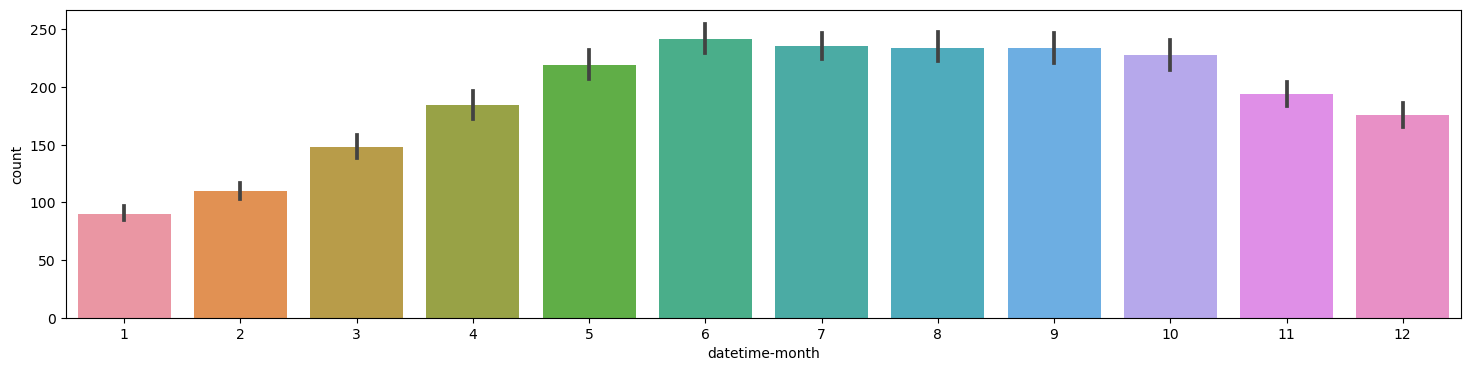

In [8]:
plt.figure(figsize=(18,4))
sns.barplot(data=train,x="datetime-month",y="count")

# 1. datetime-year_month 생성 후 visualization

In [9]:
for dataset in datasets:
    dataset["datetime-year_month"]=dataset["datetime-year"].astype("str")+"-"+dataset['datetime-month'].astype("str")
train[["datetime","datetime-year_month"]]

,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


<Axes: xlabel='datetime-year_month', ylabel='count'>

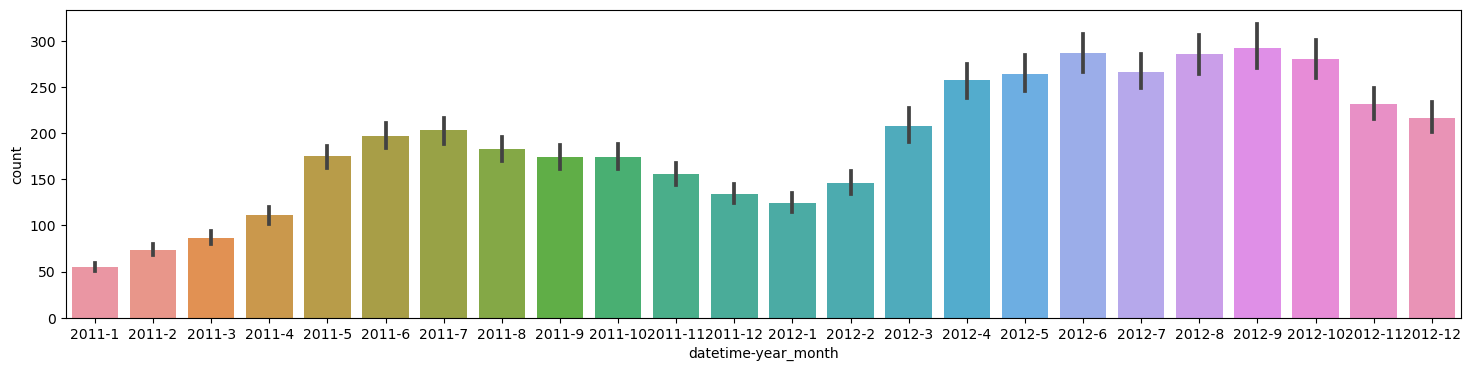

In [10]:
plt.figure(figsize=(18,4))
sns.barplot(data=train,x="datetime-year_month",y="count")

## idea
1. 2012-12의 대여량이 2011-1보다 4배 이상 큼 &rarr; 12월이 1월보다 대여량이 많은 것이 trend인 것으로 오해할 소지가 있음
2. 사실은 'Capital Bikeshare' 회사의 꾸준한 성장에 따른 자연스러운 매출 증가 (근거: 2011-12과 2012-1은 대여량 차이가 없음)
3. '회사 성장에 따른 자연스러운 매출 증가'라는 사실율 Python에게 알리기가 곤란
4. &rarr; 따라서 아예 "datetime_month" 변수를 feature_names에서 제거
5. Kaggle score 상당히 좋아짐